In [272]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import os
os.chdir('/tmp/guest-7fm6ma/Downloads/Societe-Generale-return-prediction-challenge-master')

In [273]:
train = pd.read_csv('train.csv')
test = pd.read_csv('test.csv')
submission = pd.read_csv('sample_submissions.csv')

In [274]:
train.head()

,transaction_id,num_var_1,num_var_2,num_var_3,num_var_4,num_var_5,num_var_6,num_var_7,cat_var_1,cat_var_2,...,cat_var_34,cat_var_35,cat_var_36,cat_var_37,cat_var_38,cat_var_39,cat_var_40,cat_var_41,cat_var_42,target
0,id_11,2.302632e-08,0.040182,0.0,1.800000e-07,2.302632e-08,2.368421e-08,1.115205e-08,NaN,ce,...,0,0,0,0,0,0,0,0,0,0
1,id_33,7.965789e-06,0.157872,0.0,2.105000e-06,2.769737e-07,7.965789e-06,2.433058e-06,da,tn,...,0,0,0,0,0,0,0,0,0,0
2,id_51,7.828947e-08,0.089140,0.0,3.550000e-07,4.671053e-08,1.052632e-07,4.276014e-07,gf,ce,...,0,0,0,0,0,0,0,0,0,0
3,id_54,7.894737e-08,0.227239,0.0,1.050000e-06,1.381579e-07,2.190789e-07,1.848054e-08,NaN,ce,...,0,0,0,0,0,0,0,0,0,0
4,id_62,3.321053e-06,0.160410,0.0,2.105000e-06,2.769737e-07,3.340789e-06,2.152983e-06,da,tn,...,0,0,0,0,0,0,0,0,0,0


In [275]:
train.describe()

,num_var_1,num_var_2,num_var_3,num_var_4,num_var_5,num_var_6,num_var_7,cat_var_19,cat_var_20,cat_var_21,...,cat_var_34,cat_var_35,cat_var_36,cat_var_37,cat_var_38,cat_var_39,cat_var_40,cat_var_41,cat_var_42,target
count,3.489780e+05,348978.000000,348978.000000,3.489780e+05,3.489780e+05,3.489780e+05,3.489780e+05,348978.000000,348978.000000,348978.000000,...,348978.000000,348978.0,348978.0,348978.0,348978.0,348978.000000,348978.0,348978.000000,348978.0,348978.000000
mean,2.059731e-05,0.160586,0.000011,4.604324e-05,8.187931e-06,1.482768e-05,1.942554e-05,0.520279,0.479721,0.672257,...,0.000003,0.0,0.0,0.0,0.0,0.000009,0.0,0.000003,0.0,0.107078
std,1.930948e-03,0.131499,0.002538,1.999947e-03,7.213736e-04,1.492990e-03,1.462171e-03,0.499589,0.499589,0.469391,...,0.001693,0.0,0.0,0.0,0.0,0.002932,0.0,0.001693,0.0,0.309213
min,0.000000e+00,0.000317,0.000000,4.000000e-08,0.000000e+00,0.000000e+00,0.000000e+00,0.000000,0.000000,0.000000,...,0.000000,0.0,0.0,0.0,0.0,0.000000,0.0,0.000000,0.0,0.000000
25%,4.605263e-08,0.084514,0.000000,3.550000e-07,4.671053e-08,4.407895e-08,1.720602e-08,0.000000,0.000000,0.000000,...,0.000000,0.0,0.0,0.0,0.0,0.000000,0.0,0.000000,0.0,0.000000
50%,1.802632e-07,0.101512,0.000000,1.875000e-06,2.598684e-07,9.868421e-08,8.252516e-08,1.000000,0.000000,1.000000,...,0.000000,0.0,0.0,0.0,0.0,0.000000,0.0,0.000000,0.0,0.000000
75%,6.513158e-07,0.160833,0.000000,2.105000e-06,2.769737e-07,4.618421e-07,3.571842e-07,1.000000,1.000000,1.000000,...,0.000000,0.0,0.0,0.0,0.0,0.000000,0.0,0.000000,0.0,0.000000
max,5.427632e-01,1.000000,0.758621,3.750000e-01,2.171053e-01,4.605263e-01,3.542030e-01,1.000000,1.000000,1.000000,...,1.000000,0.0,0.0,0.0,0.0,1.000000,0.0,1.000000,0.0,1.000000


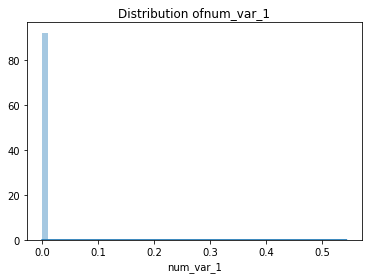

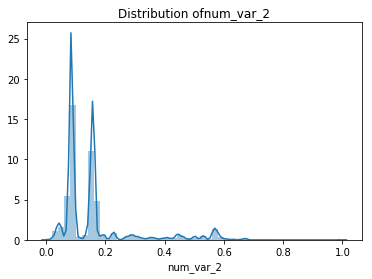

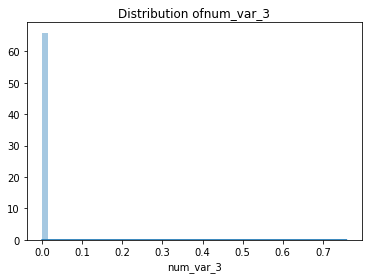

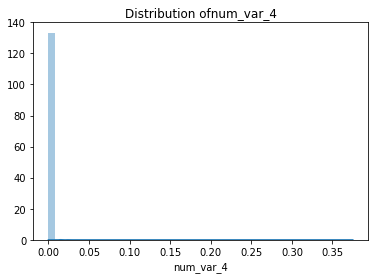

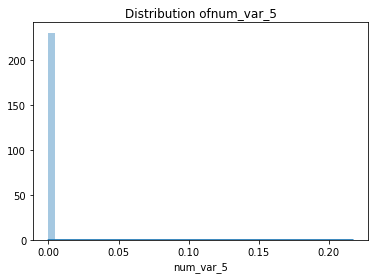

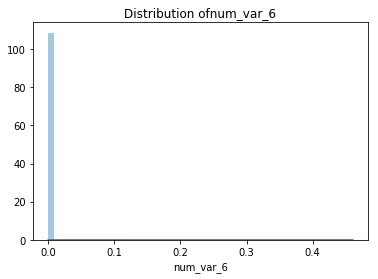

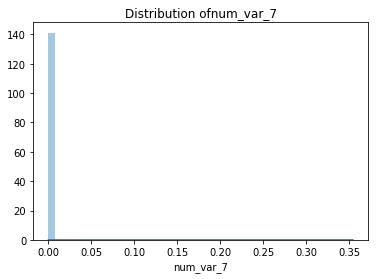

In [276]:
for i in range(len(train.columns[:7])):
    sns.distplot(train.iloc[:,i+1])
    plt.title('Distribution of'+train.columns[i+1])
    plt.show()

In [277]:
train.isnull().sum()/len(train)

transaction_id    0.000000
num_var_1         0.000000
num_var_2         0.000000
num_var_3         0.000000
num_var_4         0.000000
num_var_5         0.000000
num_var_6         0.000000
num_var_7         0.000000
cat_var_1         0.045223
cat_var_2         0.000000
cat_var_3         0.125661
cat_var_4         0.000000
cat_var_5         0.000000
cat_var_6         0.000000
cat_var_7         0.000000
cat_var_8         0.314455
cat_var_9         0.000000
cat_var_10        0.000000
cat_var_11        0.000000
cat_var_12        0.000000
cat_var_13        0.000000
cat_var_14        0.000000
cat_var_15        0.000000
cat_var_16        0.000000
cat_var_17        0.000000
cat_var_18        0.000000
cat_var_19        0.000000
cat_var_20        0.000000
cat_var_21        0.000000
cat_var_22        0.000000
cat_var_23        0.000000
cat_var_24        0.000000
cat_var_25        0.000000
cat_var_26        0.000000
cat_var_27        0.000000
cat_var_28        0.000000
cat_var_29        0.000000
c

In [278]:
#filling the null values with maximum values within columns

train.cat_var_1 = train.cat_var_1.fillna('gf', axis = 0)
train.cat_var_3 = train.cat_var_3.fillna('qt', axis = 0)
train.cat_var_8 = train.cat_var_8.fillna('dn', axis = 0)

test.cat_var_1 = test.cat_var_1.fillna('gf', axis = 0)
test.cat_var_3 = test.cat_var_3.fillna('qt', axis = 0)
test.cat_var_8 = test.cat_var_8.fillna('dn', axis = 0)
test.cat_var_6 = test.cat_var_6.fillna('zs', axis = 0)

In [279]:
test.isnull().values.any()

False

In [280]:
train.cat_var_4.value_counts()

tn    232909
ep    116069
Name: cat_var_4, dtype: int64

In [281]:
list(train.iloc[:, 31:].columns)

['cat_var_24',
 'cat_var_25',
 'cat_var_26',
 'cat_var_27',
 'cat_var_28',
 'cat_var_29',
 'cat_var_30',
 'cat_var_31',
 'cat_var_32',
 'cat_var_33',
 'cat_var_34',
 'cat_var_35',
 'cat_var_36',
 'cat_var_37',
 'cat_var_38',
 'cat_var_39',
 'cat_var_40',
 'cat_var_41',
 'cat_var_42',
 'target']

In [282]:
training_set = train.drop(labels = ['transaction_id'] ,axis = 1)
test_set = test.drop(labels = ['transaction_id'], axis = 1)
target = train['target']

training_set = training_set.drop(labels = list(training_set.iloc[:,33:]), axis = 1)
test_set = test_set.drop(labels = list(test_set.iloc[:, 33:]), axis = 1)

In [283]:
#extra droppings for greedy backward selection
training_set = training_set.drop(labels = [ 'cat_var_4', 'cat_var_25'], axis = 1)
test_set = test_set.drop(labels = [ 'cat_var_4','cat_var_25'], axis = 1)

In [284]:
test_set.head()

,num_var_1,num_var_2,num_var_3,num_var_4,num_var_5,num_var_6,num_var_7,cat_var_1,cat_var_2,cat_var_3,...,cat_var_16,cat_var_17,cat_var_18,cat_var_19,cat_var_20,cat_var_21,cat_var_22,cat_var_23,cat_var_24,cat_var_26
0,4.736842e-07,0.162737,0.0,2.105000e-06,2.769737e-07,4.828947e-07,1.300010e-07,da,tn,gt,...,tn,tn,tn,1,0,1,0,0,1,0
1,6.578947e-08,0.086391,0.0,7.500000e-07,1.315789e-07,9.868421e-08,3.186300e-08,pu,ce,qt,...,ep,tn,tn,0,1,1,0,0,1,0
2,1.585526e-07,0.159987,0.0,2.105000e-06,2.769737e-07,1.585526e-07,4.715724e-08,da,tn,qz,...,tn,ep,tn,1,0,1,0,0,1,0
3,8.552632e-08,0.088083,0.0,7.500000e-07,8.552632e-08,9.868421e-08,4.142190e-08,pu,ce,ex,...,ep,tn,tn,0,1,1,0,0,1,0
4,1.144737e-07,0.089563,0.0,3.550000e-07,4.671053e-08,4.407895e-08,1.452953e-07,gf,ce,qt,...,tn,tn,ep,0,1,0,1,0,1,0


In [285]:
from sklearn.preprocessing import LabelEncoder

In [286]:
lbl = []
for i in range(len(training_set.iloc[:,7:28].columns)):
    lbl.append(LabelEncoder())

In [287]:
#def new_value_removal(x, df):
 #   if x not in df.unique():
  #      x = df.value_counts().idxmax()
   # return x

In [288]:
for i in range(len(training_set.iloc[:,7:28].columns)):
    #test_set.iloc[:,i+7] = test_set.iloc[:,i+7].map(lambda x:new_value_removal(x, training_set.iloc[:,i+7]))
    training_set.iloc[:,i+7] = lbl[i].fit_transform(training_set.iloc[:,i+7])
    test_set.iloc[:,i+7] = lbl[i].fit_transform(test_set.iloc[:,i+7])

In [289]:
from sklearn.model_selection import train_test_split

In [290]:
x_data, x_test, y_data, y_test = train_test_split(training_set, target, test_size = 0.1, random_state = 0, stratify = target)
x_data = x_data.reset_index(drop = True)
y_data = y_data.reset_index(drop = True)
x_test = x_test.reset_index(drop = True)
y_test = y_test.reset_index(drop = True)

In [291]:
#from imblearn.over_sampling import SMOTE
#x_data_resampled, y_data_resampled = SMOTE(random_state = 1, ratio=0.4).fit_sample(x_data, y_data)
#x_data_resampled = pd.DataFrame(x_data_resampled, columns = x_data.columns)
#y_data_resampled = pd.Series(y_data_resampled)

In [292]:
#print(len(x_data_resampled)/len(x_data))

In [293]:
#sns.violinplot(y_data_resampled)
#plt.title('Distribution after resampling')
#plt.show()

#sns.violinplot(y_data)
#plt.title('Distribution before resampling')
#plt.show()

In [294]:
x_train, x_val, y_train, y_val = train_test_split(x_data, y_data, test_size = 0.2, random_state = 0, stratify = y_data)
x_train = x_train.reset_index(drop = True)
x_val = x_val.reset_index(drop = True)
y_train = y_train.reset_index(drop = True)
y_val = y_val.reset_index(drop = True)

In [ ]:
import xgboost as xgb

In [ ]:

params = {"objective":"binary:logistic",
          "booster":"gbtree",
          "eta":0.1,
          "max_depth": 7,
         "subsample":0.9,
         "silent":0,
         "seed":0,
         "lambda":0.04,
         "alpha":.1,
         #'skip_drop': 0.8,
         "eval_metric":"auc"}

num_boost_round = 500

dtrain = xgb.DMatrix(x_train, y_train)
dvalid = xgb.DMatrix(x_val, y_val)

watchlist = [(dtrain, 'train'), (dvalid, 'eval')]

booster = xgb.train(params, dtrain, num_boost_round, evals = watchlist, early_stopping_rounds = 50)
xgb.cv(params, dtrain, num_boost_round, nfold = 5, early_stopping_rounds = 50,callbacks=[xgb.callback.print_evaluation(show_stdv=False)])

[0]	train-auc:0.719236	eval-auc:0.708521
Multiple eval metrics have been passed: 'eval-auc' will be used for early stopping.

Will train until eval-auc hasn't improved in 50 rounds.
[1]	train-auc:0.721117	eval-auc:0.71218
[2]	train-auc:0.721405	eval-auc:0.71182
[3]	train-auc:0.721581	eval-auc:0.711995
[4]	train-auc:0.721763	eval-auc:0.711785
[5]	train-auc:0.722695	eval-auc:0.712477
[6]	train-auc:0.723012	eval-auc:0.712558
[7]	train-auc:0.723369	eval-auc:0.712263
[8]	train-auc:0.725873	eval-auc:0.714682
[9]	train-auc:0.726427	eval-auc:0.715497
[10]	train-auc:0.727147	eval-auc:0.716099
[11]	train-auc:0.727422	eval-auc:0.716616
[12]	train-auc:0.727436	eval-auc:0.716743
[13]	train-auc:0.728195	eval-auc:0.716944
[14]	train-auc:0.728238	eval-auc:0.716775
[15]	train-auc:0.728979	eval-auc:0.718077
[16]	train-auc:0.729771	eval-auc:0.718859
[17]	train-auc:0.730989	eval-auc:0.71874
[18]	train-auc:0.732128	eval-auc:0.719231
[19]	train-auc:0.732353	eval-auc:0.719225
[20]	train-auc:0.733205	eval-auc

[10]	train-auc:0.727129	test-auc:0.722298
[11]	train-auc:0.727702	test-auc:0.723072
[12]	train-auc:0.728344	test-auc:0.723648
[13]	train-auc:0.728549	test-auc:0.723897
[14]	train-auc:0.729725	test-auc:0.724481
[15]	train-auc:0.730605	test-auc:0.725229
[16]	train-auc:0.731557	test-auc:0.725999
[17]	train-auc:0.732232	test-auc:0.726198
[18]	train-auc:0.732374	test-auc:0.726334
[19]	train-auc:0.732823	test-auc:0.7264
[20]	train-auc:0.73322	test-auc:0.726653
[21]	train-auc:0.73391	test-auc:0.727089
[22]	train-auc:0.734352	test-auc:0.727163
[23]	train-auc:0.735455	test-auc:0.727292
[24]	train-auc:0.736145	test-auc:0.727282


In [ ]:
feature_importance = pd.DataFrame(list(booster.get_fscore().items()), columns = ['feature', 'importance']).sort_values('importance', ascending=False)

In [ ]:
feature_importance

In [ ]:
from sklearn.metrics import roc_auc_score

In [ ]:
xgb_pred_train = booster.predict(xgb.DMatrix(x_train))
xgb_pred_val = booster.predict(xgb.DMatrix(x_val))
xgb_pred_test = booster.predict(xgb.DMatrix(x_test))

In [ ]:
print('AUC (XGB) =', roc_auc_score(y_test, xgb_pred_test))

In [ ]:
predictions = booster.predict(xgb.DMatrix(test_set))

In [ ]:
submission['target'] = pd.DataFrame({'target':predictions})

In [ ]:
submission.to_csv('sub3.csv', index = False)